# Урок 6. Многоклассовая классификация.

Посмотрим на примере алгоритма логистической регрессии и метода опорных векторов, как работать с различными методами многоклассовой классификации.

### 1.
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [15]:
# load_wine

In [29]:
dataset = load_wine()
features = dataset.data
target = dataset.target

# print(dataset.feature_names, dataset.target_names)

x_train, x_test, y_train, y_test = train_test_split(features[:, [9, 11, 12]], target, random_state=17)

# features.shape
# features[:, [9,11,12]].shape


**Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.**

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [54]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

### 2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
lr = LogisticRegression(random_state=17, multi_class="ovr").fit(x_train, y_train)

clf_train = cross_val_score(lr, x_train, y_train, cv=skf)
clf_test = cross_val_score(lr, x_test, y_test, cv=skf)
clf_train.mean(), clf_test.mean()
# clf_train, clf_test

(0.9096866096866097, 0.9555555555555555)

### 3.
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [58]:
from sklearn.svm import SVC

In [62]:
svc = SVC(random_state=17).fit(x_train, y_train)
cv_score_train = cross_val_score(svc, x_train, y_train, cv=skf)
cv_score_test = cross_val_score(svc, x_test, y_test, cv=skf)

cv_score_train.mean(), cv_score_test.mean()


(0.6923076923076923, 0.7555555555555554)

Как видно из полученной метрики, на тестовой выборке метод с гиперпараметрами по умолчанию работает явно намного хуже логистической регрессии. В целом, SVM достаточно плохо масштабируется на размер обучающего набора данных (как видно, даже с тремя признаками он работает не очень хорошо), но благодаря возможности выбора различных ядер (функций близости, которые помогают разделять данные) и другим гиперпараметрам SVM можно достаточно точно настроить под определенный вид данных. Подробнее на этом останавливаться в контексте данного урока не будем.

### 4.
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:

svc_c_matrix = confusion_matrix(y_test, svc.predict(x_test))

lr_c_matrix = confusion_matrix(y_test, lr.predict(x_test))

print(svc_c_matrix)
print()
print(lr_c_matrix)



[[ 9  0  0]
 [ 0 19  0]
 [ 2 15  0]]

[[ 9  0  0]
 [ 0 19  0]
 [ 0  4 13]]


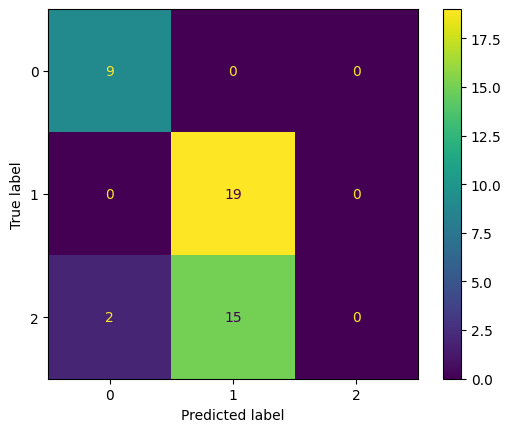

In [71]:
# class sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)[source]#
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
svc_display = ConfusionMatrixDisplay(svc_c_matrix)
svc_display.plot()
plt.show()

# Как видно на графике больше всего путает класс №2 предполагая, что это класс №0 или №1(в основном относит к №1)

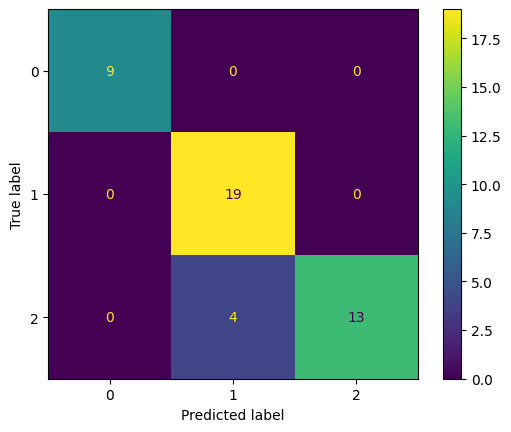

In [72]:
lr_display = ConfusionMatrixDisplay(lr_c_matrix)
lr_display.plot()
plt.show()
# Как видно на графике больше всего путает класс №2 предполагая, что это класс №1, но ошибка сильно снизилась

### 5.
Для каждой модели выведите classification report.

In [79]:
lr_cl_report = classification_report(y_test, lr.predict(x_test))

svc_cl_report = classification_report(y_test, svc.predict(x_test))

print(f'Linear regression cross validation: \n{lr_cl_report}')
print()
print(f'C-Support Vector Classification: \n{svc_cl_report}')


Linear regression cross validation: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.90        19
           2       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45


C-Support Vector Classification: 
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.56      1.00      0.72        19
           2       0.00      0.00      0.00        17

    accuracy                           0.62        45
   macro avg       0.46      0.67      0.54        45
weighted avg       0.40      0.62      0.48        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
